<a href="https://colab.research.google.com/github/DenisGubanov/EVRAZ-Collabs-solution/blob/main/Quality_Prediction_in_a_Mining_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/MiningProcess_Flotation_Plant_Database.csv')
dfcopy = df.copy()

Mounted at /content/drive


In [ ]:
def preprocessingDF(df):

  df = df.stack().str.replace(',','.').unstack()

  dftemp = df.loc[:, df.columns != 'date']
  s = dftemp.select_dtypes(include='object').columns
  df[s] = df[s].astype("float")

  condition = (df["date"] != "2017-04-10 00:00:00")
  df= df[condition]

  df.index = df['date']
  df = df.drop('date',axis=1)
  df = df[174:]
  
  df['iron'] = df['% Iron Feed']
  df = df.drop('% Iron Feed',axis=1)
  df['silica'] = df['% Silica Feed']
  df = df.drop('% Silica Feed',axis=1)
  df['starchflow'] = df['Starch Flow']
  df = df.drop('Starch Flow',axis=1)
  df['aminaflow'] = df['Amina Flow']
  df = df.drop('Amina Flow',axis=1)
  df['orepulpflow'] = df['Ore Pulp Flow']
  df = df.drop('Ore Pulp Flow',axis=1)
  df['orepulpPH'] = df['Ore Pulp pH']
  df = df.drop('Ore Pulp pH',axis=1)
  df['orepulpDensity'] = df['Ore Pulp Density']
  df = df.drop('Ore Pulp Density',axis=1)
  df['flotationAir1'] = df['Flotation Column 02 Air Flow']
  df = df.drop('Flotation Column 02 Air Flow',axis=1)
  df['flotationAir2'] = df['Flotation Column 04 Air Flow']
  df = df.drop('Flotation Column 04 Air Flow',axis=1)
  df['flotationAir3'] = df['Flotation Column 05 Air Flow']
  df = df.drop('Flotation Column 05 Air Flow',axis=1)
  df['flotationAir4'] = df['Flotation Column 06 Air Flow']
  df = df.drop('Flotation Column 06 Air Flow',axis=1)
  df['flotationLevel1'] = df['Flotation Column 01 Level']
  df = df.drop('Flotation Column 01 Level',axis=1)
  df['flotationLevel2'] = df['Flotation Column 04 Level']
  df = df.drop('Flotation Column 04 Level',axis=1)
  df['concentrateIron'] = df['% Iron Concentrate']
  df = df.drop('% Iron Concentrate',axis=1)
  df['concentrateSilica'] = df['% Silica Concentrate']
  df = df.drop('% Silica Concentrate',axis=1)

  # Сильно коррелирующие фичи:
  df = df.drop('Flotation Column 01 Air Flow',axis=1)
  df = df.drop('Flotation Column 03 Air Flow',axis=1)
  df = df.drop('Flotation Column 07 Air Flow',axis=1)
  df = df.drop('Flotation Column 02 Level',axis=1)
  df = df.drop('Flotation Column 03 Level',axis=1)
  df = df.drop('Flotation Column 05 Level',axis=1)
  df = df.drop('Flotation Column 06 Level',axis=1)
  df = df.drop('Flotation Column 07 Level',axis=1)
  
  return df

In [ ]:
#dateFormatter = "%Y-%m-%d %H:%M:%S"
#df['date'] = pd.to_datetime(df['date'])# datetime.strptime(str(df['date']), dateFormatter)

In [ ]:
df = preprocessingDF(df)

In [ ]:
df

,iron,silica,starchflow,aminaflow,orepulpflow,orepulpPH,orepulpDensity,flotationAir1,flotationAir2,flotationAir3,flotationAir4,flotationLevel1,flotationLevel2,concentrateIron,concentrateSilica
date,,,,,,,,,,,,,,,
2017-03-10 02:00:00,55.20,16.98,3170.41,539.673,399.697,10.15890,1.66910,248.269,295.096,306.400,250.488,462.601,433.629,67.06,1.11
2017-03-10 02:00:00,55.20,16.98,3208.30,544.922,397.529,10.15840,1.66807,252.070,295.096,306.400,250.488,468.357,445.156,67.06,1.11
2017-03-10 02:00:00,55.20,16.98,3211.33,543.488,391.626,10.15780,1.66704,250.488,295.096,306.400,250.367,463.978,449.784,67.06,1.11
2017-03-10 02:00:00,55.20,16.98,3202.64,540.863,395.229,10.15720,1.66601,248.555,295.096,306.400,250.148,458.823,456.188,67.06,1.11
2017-03-10 02:00:00,55.20,16.98,3221.00,541.626,400.020,10.15660,1.66497,250.477,295.096,306.400,250.170,438.478,477.986,67.06,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,298.786,299.920,299.623,346.794,392.160,418.725,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,301.879,299.710,300.465,330.023,401.505,418.377,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,307.397,299.927,299.707,329.590,408.899,419.531,64.27,1.71


In [ ]:
dfbase = df.groupby(df.index).mean()
dfbase

,iron,silica,starchflow,aminaflow,orepulpflow,orepulpPH,orepulpDensity,flotationAir1,flotationAir2,flotationAir3,flotationAir4,flotationLevel1,flotationLevel2,concentrateIron,concentrateSilica
date,,,,,,,,,,,,,,,
2017-03-10 02:00:00,55.20,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,250.214050,295.096000,306.400000,249.909494,449.373361,450.328806,67.06,1.11
2017-03-10 03:00:00,55.20,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.104167,295.096000,306.400000,250.242161,449.972878,451.145822,66.97,1.27
2017-03-10 04:00:00,55.20,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.204761,295.096000,306.400000,249.825122,487.940706,494.528183,66.75,1.36
2017-03-10 05:00:00,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,250.160494,295.096000,306.400000,250.249600,549.031539,549.975483,66.63,1.34
2017-03-10 06:00:00,55.20,16.98,3405.162222,621.878539,399.749344,9.892237,1.765064,250.111022,295.096000,306.400000,249.942494,550.599567,549.609700,66.85,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,49.75,23.20,3327.047776,497.211189,380.847200,9.176166,1.660871,300.169133,299.951150,299.924156,335.658144,397.781583,398.930467,65.05,1.65
2017-09-09 20:00:00,49.75,23.20,4225.800333,508.963856,381.112889,9.387541,1.691996,299.967839,299.963478,299.959856,348.172800,399.928567,399.967122,64.83,1.71
2017-09-09 21:00:00,49.75,23.20,2808.214692,517.748822,381.064411,9.771277,1.735647,299.801561,299.861706,299.926650,349.422803,399.961433,399.931033,64.29,1.80


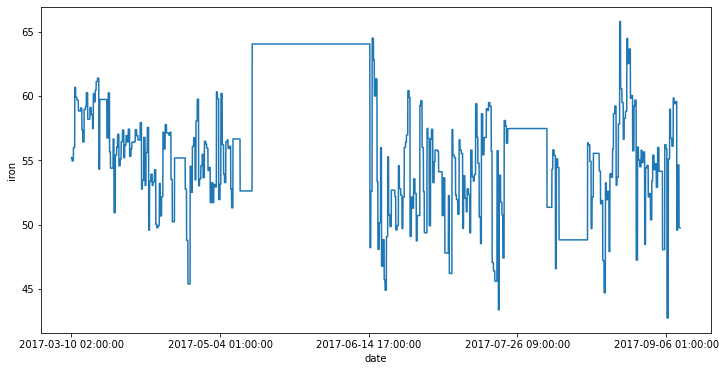

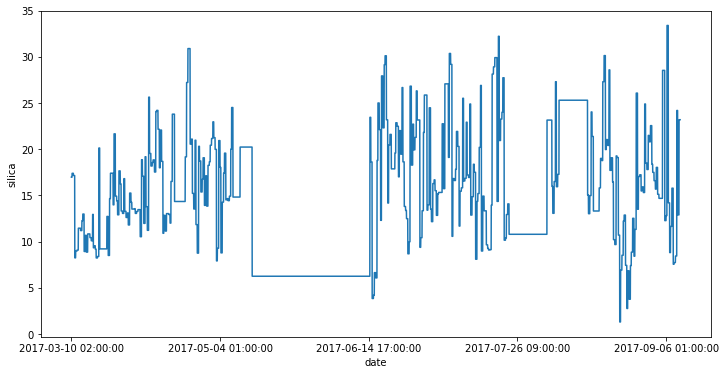

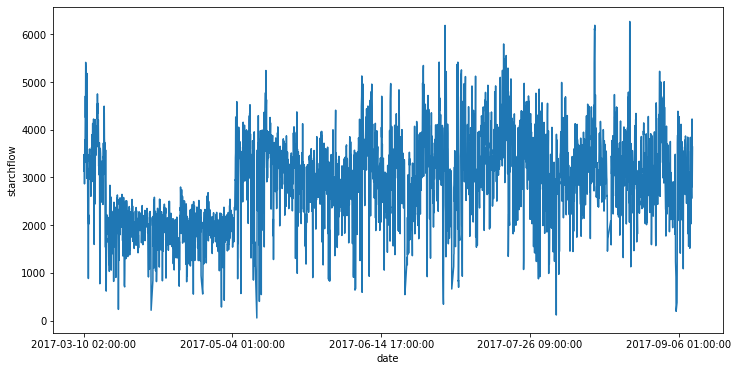

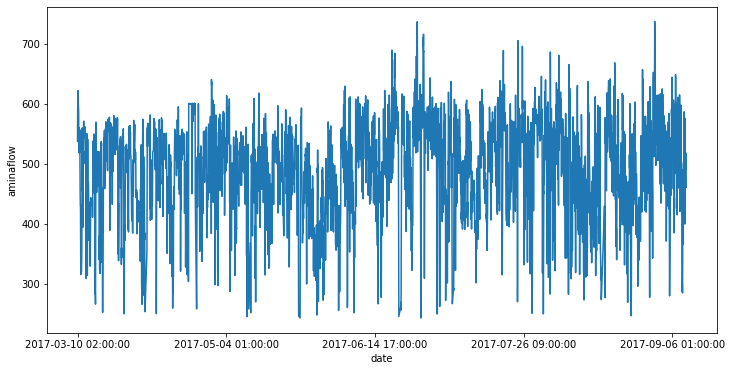

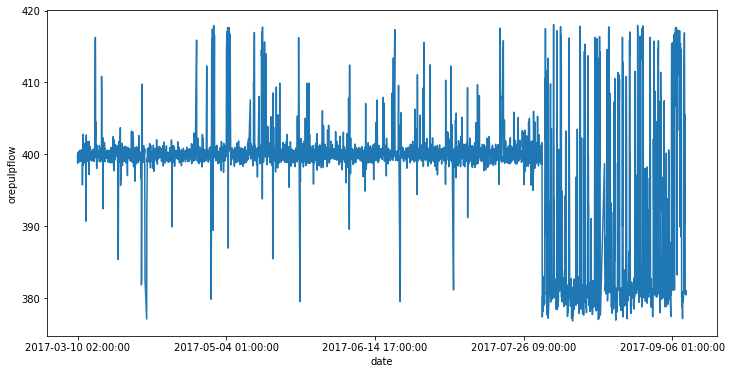

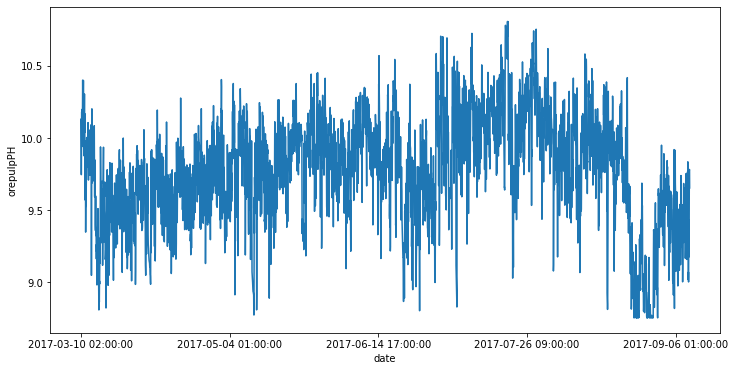

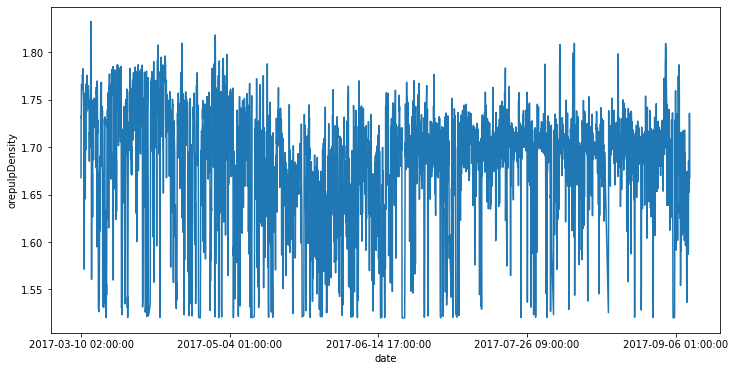

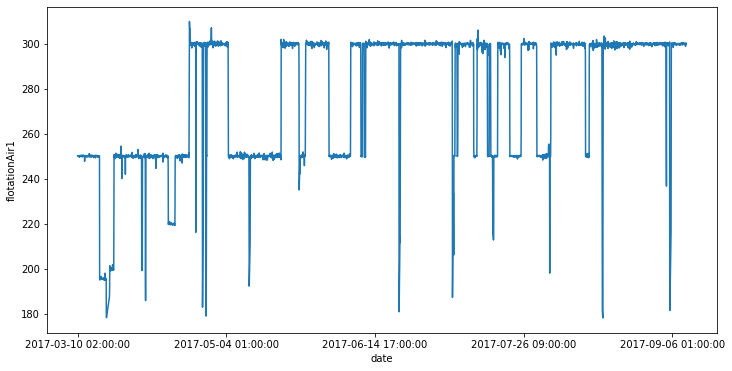

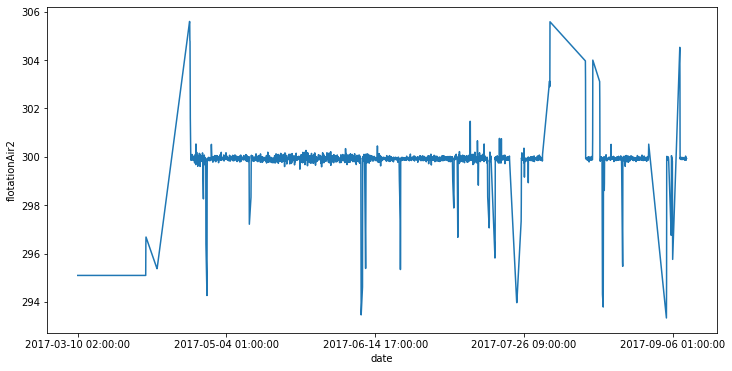

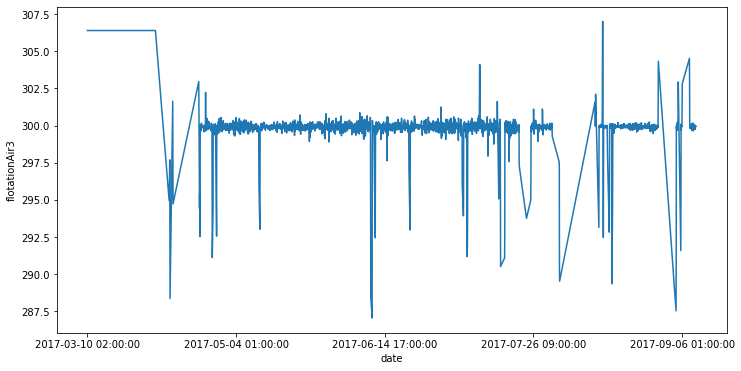

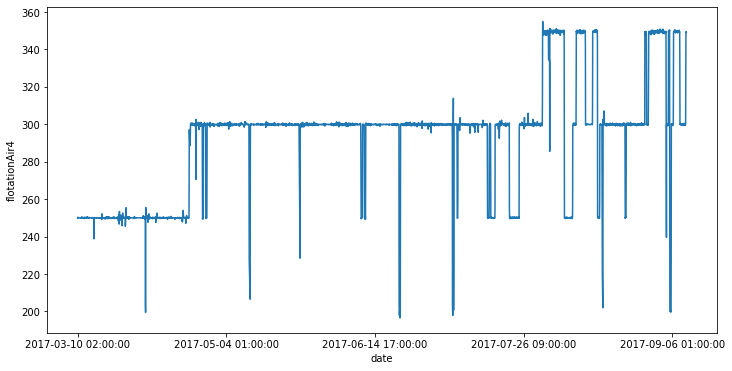

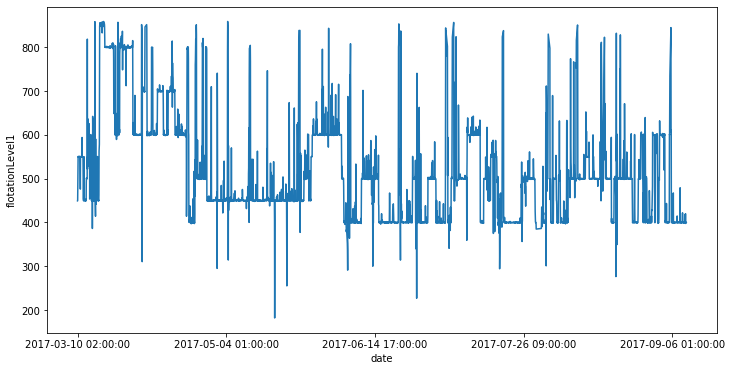

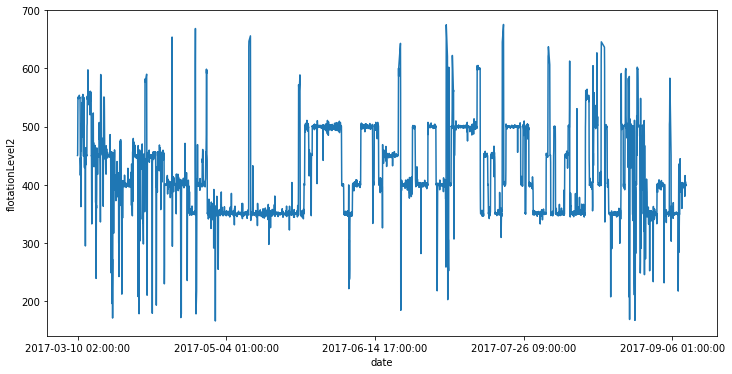

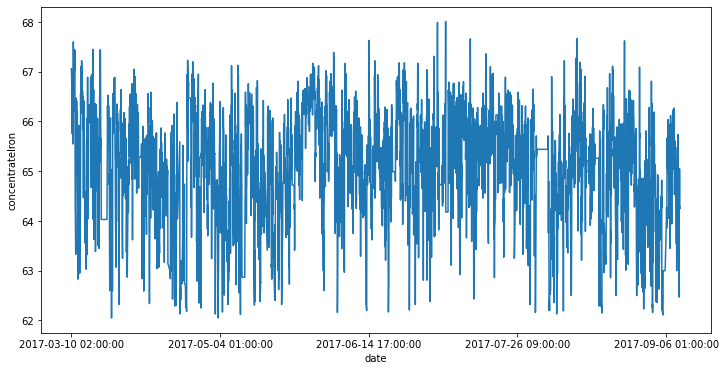

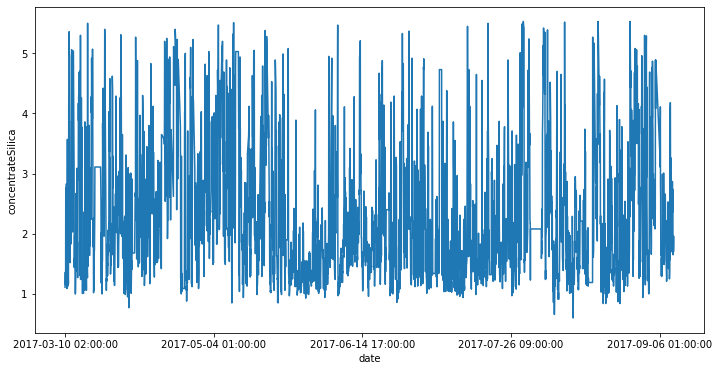

In [ ]:
for i in dfbase.columns:
  plt.ylabel(str(i))
  dfbase[i].plot(figsize=(12,6))
  plt.show()

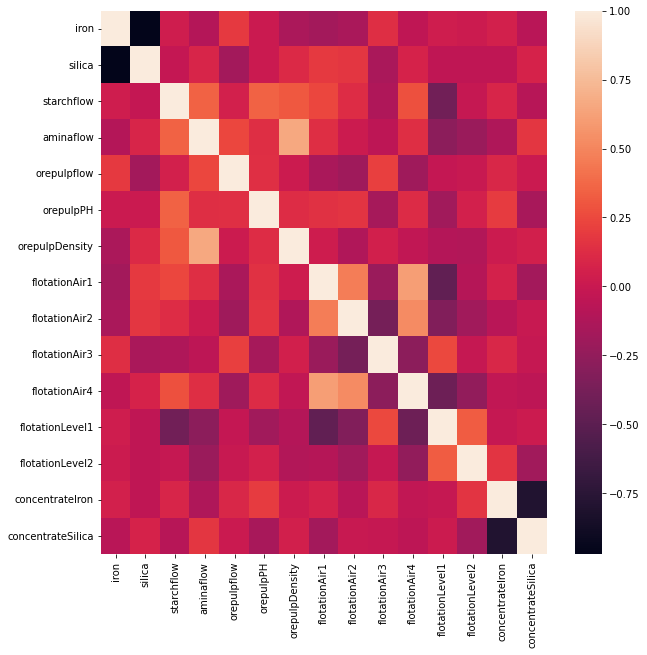

In [ ]:
corr = dfbase.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr)

In [ ]:
import matplotlib.pyplot as plt

# Функция разброса
def boxplotDF(df):
  k = 1
  for i in df.columns:
    plt.figure(figsize=(10,10))
    plt.subplot(4,1,k)
    sns.boxplot(df[i],color='red')
    plt.show()
    if (k == 4):
      k = 0
    k = k + 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


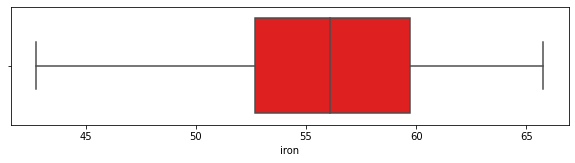

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


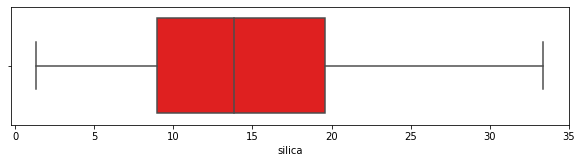

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


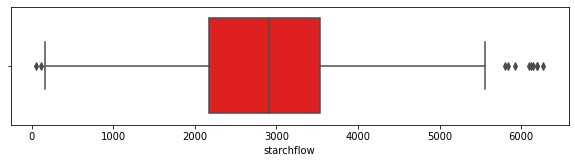

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


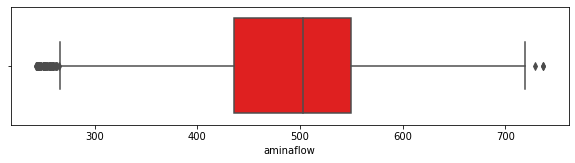

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


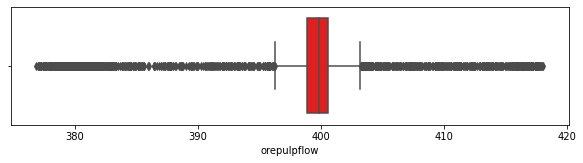

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


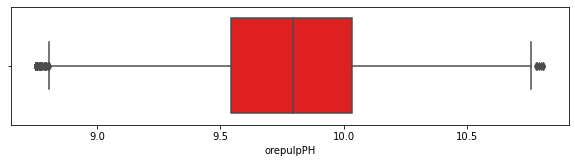

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


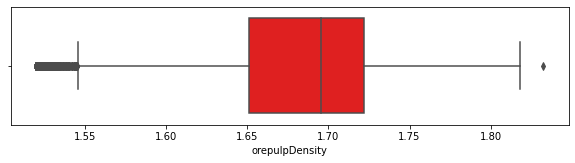

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


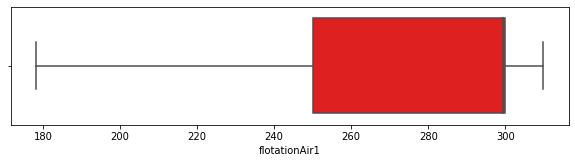

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


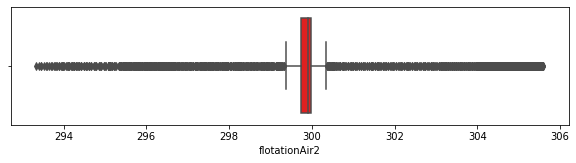

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


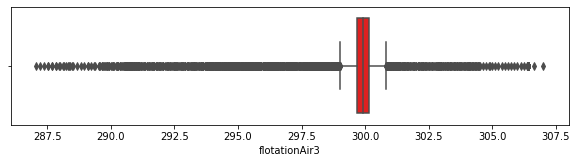

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


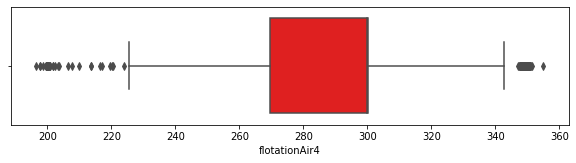

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


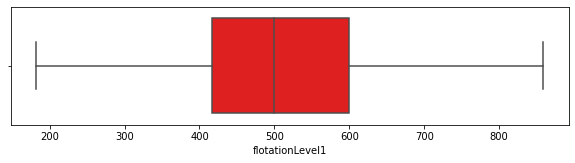

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


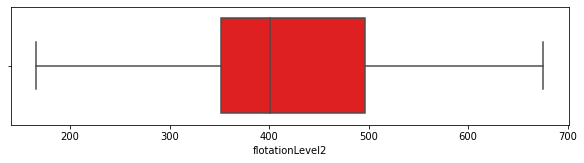

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


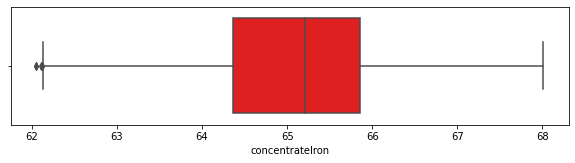

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


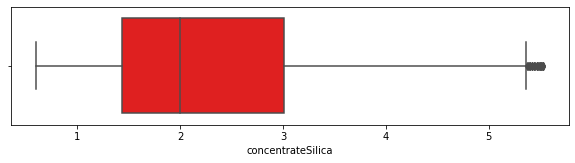

In [ ]:
boxplotDF(dfbase)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dfbase = scaler.fit_transform(dfbase)

In [ ]:
dfbase = pd.DataFrame(dfbase)

In [ ]:
dfbase

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.540799,0.488314,0.495315,0.595667,0.558641,0.670090,0.473141,0.546894,0.143501,0.969443,0.336962,0.394990,0.558148,0.840604,0.103448
1,0.540799,0.488314,0.551018,0.706357,0.531768,0.630490,0.680903,0.546060,0.143501,0.969443,0.339062,0.395876,0.559751,0.825503,0.135903
2,0.540799,0.488314,0.510564,0.708914,0.558523,0.567301,0.675607,0.546824,0.143501,0.969443,0.336430,0.451950,0.644830,0.788591,0.154158
3,0.540799,0.488314,0.526531,0.762635,0.552414,0.483276,0.787041,0.546488,0.143501,0.969443,0.339108,0.542174,0.753570,0.768456,0.150101
4,0.540799,0.488314,0.539061,0.767022,0.555670,0.554459,0.784432,0.546112,0.143501,0.969443,0.337171,0.544490,0.752852,0.805369,0.111562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,0.304253,0.682144,0.526493,0.514687,0.097243,0.205833,0.451019,0.926206,0.539516,0.644893,0.878076,0.318795,0.457349,0.503356,0.212982
4091,0.304253,0.682144,0.671090,0.538475,0.103687,0.308743,0.550618,0.924677,0.540522,0.646682,0.957049,0.321966,0.459382,0.466443,0.225152
4092,0.304253,0.682144,0.443020,0.556257,0.102511,0.495568,0.690298,0.923415,0.532221,0.645018,0.964937,0.322014,0.459311,0.375839,0.243408
4093,0.304253,0.682144,0.504685,0.505174,0.087489,0.500848,0.629491,0.922488,0.538947,0.645537,0.966141,0.321483,0.460340,0.369128,0.275862


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dfbase, test_size=0.2)

In [ ]:
# Не работает, выбросы хранят важнейшую информацию.

train = train[train[4] > -0.5]
train = train[train[4] < 0.5]

train = train[train[9] > -0.3]
train = train[train[9] < 0.3]

train = train[train[8] > -0.1]
train = train[train[8] < 0.4]

In [ ]:
y_train = train[14]
y_test = test[14]
X_train = train.loc[:,0:13]
X_test = test.loc[:,0:13]
print(len(y_train),len(y_test))
X_test.index = range(819)
y_test.index = range(819)
X_train.index = range(819*4)
y_train.index = range(819*4)

3276 819


In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.638889,0.295731,0.592719,0.602258,0.563527,0.458809,0.655913,0.544789,0.534693,0.644532,0.648186,0.301452,0.327145,0.562081
1,0.726562,0.224992,0.525705,0.351698,0.234566,0.229905,0.633331,0.927569,0.539346,0.647283,0.650630,0.470447,0.552921,0.541946
2,0.638889,0.295731,0.487124,0.343075,0.084516,0.526403,0.576010,0.917315,0.987303,0.177338,0.965849,0.322591,0.365176,0.568792
3,0.709635,0.284512,0.550594,0.490471,0.576271,0.507910,0.792131,0.543429,0.143501,0.969443,0.337699,0.544634,0.555486,0.501678
4,0.456163,0.618884,0.343985,0.513142,0.533307,0.700177,0.505179,0.921034,0.542069,0.644953,0.655821,0.397373,0.365642,0.575503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0.237413,0.690246,0.504118,0.480688,0.555501,0.465145,0.383462,0.926517,0.540910,0.663588,0.652320,0.470701,0.664502,0.609060
815,0.263455,0.747897,0.557146,0.281844,0.066567,0.681346,0.196508,0.925967,0.891372,0.616443,0.967724,0.469756,0.362494,0.625839
816,0.638889,0.295731,0.261175,0.013851,0.123532,0.703838,0.002029,0.549114,0.588816,0.600523,0.958426,0.322468,0.360294,0.568792
817,0.722656,0.200374,0.610000,0.396139,0.587701,0.314745,0.274862,0.925729,0.541636,0.642374,0.650997,0.323741,0.458015,0.488255


In [ ]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

par = {'n_estimators': [10],
       'max_depth': [1,3,5],
       'min_samples_leaf': [1,2,3],
       'min_samples_split': [1,2,3]}
grid = GridSearchCV(regressor,par,cv=3)
grid.fit(X_train, y_train)
grid.best_params_

In [ ]:
regressor = RandomForestRegressor(n_estimators=150, random_state=32,max_depth=5,min_samples_leaf=3,min_samples_split=3)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([ 1.73397282, -0.09417947,  1.21776563, -0.60095975, -0.55504533,
       -0.91025474,  0.32293363,  0.44656161,  0.8893495 , -0.11182644,
       -0.28948058, -0.2357654 , -0.6245408 , -0.38425391,  0.03182076,
        0.20490992, -0.26328097, -0.40763577,  0.02346366,  1.79229298,
       -0.56861222, -0.04643587,  0.10026518, -0.9543353 , -0.77001686,
       -0.50061132, -1.00311887, -0.60679331, -0.10851272,  1.08143302,
        1.5606735 ,  0.0886998 , -0.62416999,  0.33706069,  1.47627205,
       -0.79965833,  0.43313755, -0.63264589,  1.66266708, -0.75935634,
       -0.58619512,  0.80549597, -0.57904145, -0.42983194, -0.44526754,
        1.66935419, -0.36791074, -0.51421461, -0.29879033, -0.42711516,
        1.68709683, -0.14906546, -0.55504521, -0.22985465, -0.78893487,
        1.78509636, -0.54998041,  0.24681518, -0.8410395 , -0.62419806,
       -0.44740549, -0.98764716, -0.42526961,  0.02282339,  1.81506254,
       -0.86465414,  1.98321509, -0.6692807 , -0.20018922, -0.22

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

regressor = ['RandomForest', 'DecisionTree','KNeighbors', 
               'GradientBoosting']

models = [RandomForestRegressor(random_state=0),
          DecisionTreeRegressor(random_state=0),
          KNeighborsRegressor(),
          GradientBoostingRegressor(random_state=0)]

#estimator.append(('GB', GradientBoostingRegressor(random_state=0,learning_rate=0.05,max_depth=4,n_estimators=500)))
#estimator.append(('KN',KNeighborsRegressor(leaf_size=10,n_neighbors=4)))
#estimator.append(('DT',DecisionTreeRegressor(random_state=0,max_depth=4,min_samples_leaf=4,min_samples_split=2)))
#estimator.append(('RF',RandomForestRegressor(random_state=0,n_estimators=500)))



In [ ]:
def acc_score(X_train, X_test, Y_train, Y_test):
    Score = pd.DataFrame({"Regressor":regressor})
    j = 0
    acc = []
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
        j = j+1     
    Score["rmse"] = acc
    Score.sort_values(by="rmse", ascending=True,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

In [ ]:
acc_score(X_train,X_test,y_train,y_test)

,Regressor,rmse
0,RandomForest,0.108036
1,GradientBoosting,0.109957
2,KNeighbors,0.117693
3,DecisionTree,0.151887


In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=0)

par = {'n_estimators': [100,300,500,1000],
       'max_depth': [2,4,6,8,10,None]}
grid = GridSearchCV(regressor,par,cv=3)

# Кол-во деревьев
print(((100+300+500+1000)*6)/1000,' мин')

grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': None, 'n_estimators': 500}


In [ ]:
regressor = GradientBoostingRegressor(random_state=0)

par = {'n_estimators': [100,300,500],
       'max_depth': [2,4,6,None],
       'learning_rate': [0.1,0.01,0.05]}
grid = GridSearchCV(regressor,par,cv=3)

# Кол-во деревьев
print(((100+300+500)*4*3)/1000,'мин')

grid.fit(X_train, y_train)
print(grid.best_params_)

10.8  мин
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}


In [ ]:
regressor = KNeighborsRegressor()

par = {'n_neighbors': [2,3,4,5,6,8,10,20],
       'leaf_size': [10,20,30,40,50]}
grid = GridSearchCV(regressor,par,cv=3)

grid.fit(X_train, y_train)
print(grid.best_params_)

{'leaf_size': 10, 'n_neighbors': 4}


In [ ]:
regressor = DecisionTreeRegressor(random_state=0)

par = {'max_depth': [4,6,8,10],
       'min_samples_leaf': [2,3,4,5,6],
       'min_samples_split': [2,3,4,5,6],
       'max_features': [1,3,5,10,None],
       'max_leaf_nodes': [1,3,5,10,None]}
grid = GridSearchCV(regressor,par,cv=3)

# Кол-во деревьев
print((4*5*5*5*7*5)/1000,' мин')

grid.fit(X_train, y_train)
print(grid.best_params_)

17.5  мин
{'max_depth': 6, 'max_features': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
# Не запускать

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import ExtraTreesRegressor
temp = 0.445

In [ ]:
from sklearn.ensemble  import AdaBoostRegressor
from sklearn.ensemble  import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
temp = 0.440

In [ ]:
from sklearn.ensemble import VotingRegressor

estimator = []
estimator.append(('GB', GradientBoostingRegressor(random_state=0,learning_rate=0.05,max_depth=5,n_estimators=500)))
estimator.append(('KN1', KNeighborsRegressor(leaf_size=4,n_neighbors=2)))
estimator.append(('KN2', KNeighborsRegressor(leaf_size=8,n_neighbors=4)))
estimator.append(('KN3', KNeighborsRegressor(leaf_size=16,n_neighbors=4)))
estimator.append(('RF1', RandomForestRegressor(random_state=0,n_estimators=1000)))
estimator.append(('RF2', RandomForestRegressor(random_state=0,n_estimators=500)))
# 0.44045

voting = VotingRegressor(estimators = estimator)
voting.fit(X_train, y_train)
Y_pred1 = voting.predict(X_test)
  
score = np.sqrt(metrics.mean_squared_error(y_test, Y_pred1))
print("rmse Voting:",score,temp)
temp = score

rmse Voting: 0.1031295689232144 0.10343127731573928


In [ ]:
Y_pred2 = pd.DataFrame()

In [ ]:
Y_pred2['pred'] = Y_pred1
Y_pred2['target'] = y_test
Y_pred2['delta'] = abs(Y_pred1-y_test)

Y_good_pred = pd.DataFrame()
Y_good_pred = Y_pred2[Y_pred2['delta'] < 0.2]

Y_normal_pred = pd.DataFrame()
Y_normal_pred = Y_pred2[Y_pred2['delta'] >= 0.2]
Y_normal_pred = Y_normal_pred[Y_normal_pred['delta'] < 0.6]

Y_bad_pred = pd.DataFrame()
Y_bad_pred = Y_pred2[Y_pred2['delta'] >= 0.6]

In [ ]:
Y_good_pred.head(20)

,pred,target,delta
0,0.307034,0.300203,0.006831
1,0.174149,0.294118,0.119968
2,0.131136,0.192698,0.061561
5,0.229463,0.235294,0.005831
6,0.740783,0.770791,0.030008
7,0.649211,0.524425,0.124787
8,0.172671,0.219067,0.046396
9,0.183460,0.119675,0.063784
10,0.199428,0.188641,0.010787
11,0.429746,0.423935,0.005811


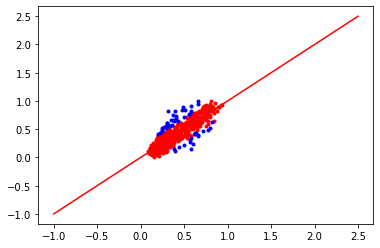

Точность :  94 6 0


In [ ]:
plt.scatter(x=Y_good_pred['pred'],y=Y_good_pred['target'],marker='.',c='red')
plt.scatter(x=Y_normal_pred['pred'],y=Y_normal_pred['target'],marker='.',c='blue')
plt.scatter(x=Y_bad_pred['pred'],y=Y_bad_pred['target'],marker='.',c='green')
plt.plot([-1,0,1,2,2.5],[-1,0,1,2,2.5],c='red')
plt.show()
print('Точность : ', round(len(Y_good_pred)/len(Y_pred2)*100), round(len(Y_normal_pred)/len(Y_pred2)*100), round(len(Y_bad_pred)/len(Y_pred2)*100))

In [ ]:
from sklearn.ensemble import VotingRegressor

estimator = []
estimator.append(('GB', GradientBoostingRegressor(random_state=0,learning_rate=0.05,max_depth=4,n_estimators=500)))
estimator.append(('KN', KNeighborsRegressor(leaf_size=10,n_neighbors=4)))
estimator.append(('RF', RandomForestRegressor(random_state=0,n_estimators=500)))

voting = VotingRegressor(estimators = estimator)
voting.fit(X_train, y_train)
Y_pred1 = voting.predict(X_test)
  
score = np.sqrt(metrics.mean_squared_error(y_test, Y_pred1))
print("Voting Score :",score)

Voting Score : 0.4435301218902393


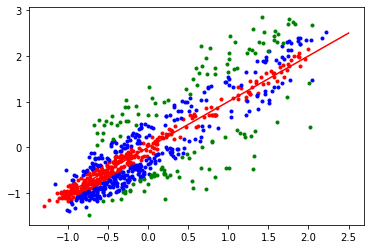

Точность :  41 42 15


In [ ]:
plt.scatter(x=Y_good_pred['pred'],y=Y_good_pred['target'],marker='.',c='red')
plt.scatter(x=Y_normal_pred['pred'],y=Y_normal_pred['target'],marker='.',c='blue')
plt.scatter(x=Y_bad_pred['pred'],y=Y_bad_pred['target'],marker='.',c='green')
plt.plot([-1,0,1,2,2.5],[-1,0,1,2,2.5],c='red')
plt.show()
print('Точность : ', int(len(Y_good_pred)/len(Y_pred2)*100), int(len(Y_normal_pred)/len(Y_pred2)*100), int(len(Y_bad_pred)/len(Y_pred2)*100))